In [ ]:
!pip install opendatasets

In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 882.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 96.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
!pip install torchinfo

In [ ]:
import opendatasets as od

In [ ]:
from pathlib import Path
data_dir = Path('Data')
data_dir.mkdir(exist_ok=True, parents=True)

In [ ]:
od.download('https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset', data_dir= data_dir)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: umerdaud
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset


In [ ]:
import os

In [ ]:
for dirpath, dirnames, filenames in os.walk(data_dir):
  print(f"There are {len(dirnames)} directories, {len(filenames)} images in {dirpath}")

There are 1 directories, 0 images in Data
There are 2 directories, 0 images in Data/brain-tumor-mri-dataset
There are 4 directories, 0 images in Data/brain-tumor-mri-dataset/Testing
There are 0 directories, 405 images in Data/brain-tumor-mri-dataset/Testing/notumor
There are 0 directories, 300 images in Data/brain-tumor-mri-dataset/Testing/glioma
There are 0 directories, 306 images in Data/brain-tumor-mri-dataset/Testing/meningioma
There are 0 directories, 300 images in Data/brain-tumor-mri-dataset/Testing/pituitary
There are 4 directories, 0 images in Data/brain-tumor-mri-dataset/Training
There are 0 directories, 1595 images in Data/brain-tumor-mri-dataset/Training/notumor
There are 0 directories, 1321 images in Data/brain-tumor-mri-dataset/Training/glioma
There are 0 directories, 1339 images in Data/brain-tumor-mri-dataset/Training/meningioma
There are 0 directories, 1457 images in Data/brain-tumor-mri-dataset/Training/pituitary


In [ ]:
train_dir = data_dir / 'brain-tumor-mri-dataset' / 'Training'
test_dir = data_dir / 'brain-tumor-mri-dataset' /'Testing'

In [ ]:
train_dir

PosixPath('Data/brain-tumor-mri-dataset/Training')

In [ ]:
train_images_list = list(train_dir.glob("*/*.jpg"))
test_images_list = list(test_dir.glob("*/*.jpg"))

In [ ]:
train_images_list

[PosixPath('Data/brain-tumor-mri-dataset/Training/notumor/Tr-no_1294.jpg'),
 PosixPath('Data/brain-tumor-mri-dataset/Training/notumor/Tr-no_1208.jpg'),
 PosixPath('Data/brain-tumor-mri-dataset/Training/notumor/Tr-no_0357.jpg'),
 PosixPath('Data/brain-tumor-mri-dataset/Training/notumor/Tr-no_0510.jpg'),
 PosixPath('Data/brain-tumor-mri-dataset/Training/notumor/Tr-no_1224.jpg'),
 PosixPath('Data/brain-tumor-mri-dataset/Training/notumor/Tr-no_1310.jpg'),
 PosixPath('Data/brain-tumor-mri-dataset/Training/notumor/Tr-no_0281.jpg'),
 PosixPath('Data/brain-tumor-mri-dataset/Training/notumor/Tr-no_1051.jpg'),
 PosixPath('Data/brain-tumor-mri-dataset/Training/notumor/Tr-no_0039.jpg'),
 PosixPath('Data/brain-tumor-mri-dataset/Training/notumor/Tr-no_1334.jpg'),
 PosixPath('Data/brain-tumor-mri-dataset/Training/notumor/Tr-no_0450.jpg'),
 PosixPath('Data/brain-tumor-mri-dataset/Training/notumor/Tr-no_0912.jpg'),
 PosixPath('Data/brain-tumor-mri-dataset/Training/notumor/Tr-no_1187.jpg'),
 PosixPath('

In [ ]:
len(train_images_list), len(test_images_list)

(5712, 1311)

In [ ]:
import torch
from torch import nn
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader

In [ ]:
simple_transform = transforms.Compose([
    transforms.Resize(size=(150, 150)),
    transforms.ToTensor()
])

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image

def plot_random_samples(images, n : int = 6):
  random_img = random.sample(images, n)
  rows = 3
  cols = 2
  for i, img in enumerate(random_img):
    if i % 2 == 0:
      img = Image.open(img)
      transformed_img = simple_transform(img)
      img = np.asarray(img)
      plt.subplot(rows, cols, i+1)
      plt.title('Original Image')
      plt.axis(False)
      plt.imshow(img)
      plt.subplot(rows, cols, i+2)
      plt.title('transformed Image')
      plt.axis(False)
      plt.imshow(transformed_img.permute(1, 2, 0))

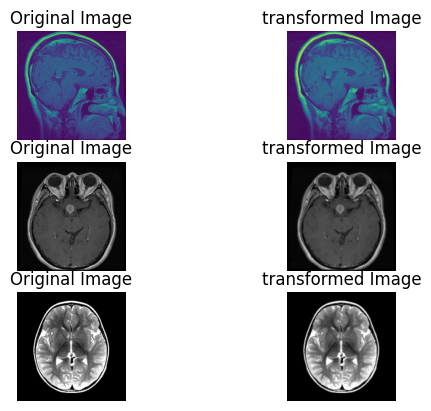

In [ ]:
plot_random_samples(train_images_list)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
train_dataset = datasets.ImageFolder(root= train_dir, transform= simple_transform)
train_dataset

Dataset ImageFolder
    Number of datapoints: 5712
    Root location: Data/brain-tumor-mri-dataset/Training
    StandardTransform
Transform: Compose(
               Resize(size=(150, 150), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )

In [ ]:
train_dataloader = DataLoader(dataset= train_dataset, batch_size= 32, shuffle= True)
train_dataloader

In [ ]:
test_dataset = datasets.ImageFolder(root = test_dir, transform= simple_transform)
test_dataset

Dataset ImageFolder
    Number of datapoints: 1311
    Root location: Data/brain-tumor-mri-dataset/Testing
    StandardTransform
Transform: Compose(
               Resize(size=(150, 150), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )

In [ ]:
test_dataloader = DataLoader(dataset= test_dataset, batch_size= 32, shuffle= False)
test_dataloader

In [ ]:
images, label = next(iter(train_dataloader))
images.shape, label.shape

(torch.Size([32, 3, 150, 150]), torch.Size([32]))

In [ ]:
class_names = sorted(entry.name for entry in os.scandir(data_dir / 'brain-tumor-mri-dataset' / 'Training') if entry.is_dir())
class_names

['glioma', 'meningioma', 'notumor', 'pituitary']

In [ ]:
class CNNModelV0(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    self.block1 = nn.Sequential(
        nn.Conv2d(in_channels= input_shape, out_channels= hidden_units,
                  kernel_size= 3,
                  stride= 1,
                  padding= 0),
        nn.ReLU(),
        nn.Conv2d(in_channels= hidden_units, out_channels= hidden_units,
                  kernel_size= 3,
                  stride= 1,
                  padding= 0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size= 2)
    )

    self.block2 = nn.Sequential(
        nn.Conv2d(in_channels= hidden_units, out_channels= hidden_units,
                  kernel_size= 3,
                  stride= 1,
                  padding= 0),
        nn.ReLU(),
        nn.Conv2d(in_channels= hidden_units, out_channels= hidden_units,
                  kernel_size= 3,
                  stride= 1,
                  padding= 0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size= 2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= hidden_units * 34 * 34, out_features= output_shape)
    )

  def forward(self, x):
    return self.classifier(self.block2(self.block1(x)))

model_0 = CNNModelV0(input_shape= 3, hidden_units= 16, output_shape= len(class_names)).to(device)
model_0

CNNModelV0(
  (block1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=18496, out_features=4, bias=True)
  )
)

In [ ]:
from torchinfo import summary

summary = summary(model_0, input_size= [1, 3, 150, 150])
summary

Layer (type:depth-idx)                   Output Shape              Param #
CNNModelV0                               [1, 4]                    --
├─Sequential: 1-1                        [1, 16, 73, 73]           --
│    └─Conv2d: 2-1                       [1, 16, 148, 148]         448
│    └─ReLU: 2-2                         [1, 16, 148, 148]         --
│    └─Conv2d: 2-3                       [1, 16, 146, 146]         2,320
│    └─ReLU: 2-4                         [1, 16, 146, 146]         --
│    └─MaxPool2d: 2-5                    [1, 16, 73, 73]           --
├─Sequential: 1-2                        [1, 16, 34, 34]           --
│    └─Conv2d: 2-6                       [1, 16, 71, 71]           2,320
│    └─ReLU: 2-7                         [1, 16, 71, 71]           --
│    └─Conv2d: 2-8                       [1, 16, 69, 69]           2,320
│    └─ReLU: 2-9                         [1, 16, 69, 69]           --
│    └─MaxPool2d: 2-10                   [1, 16, 34, 34]           --
├─Seq

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params= model_0.parameters(), lr= 0.001)

In [ ]:
from torchmetrics import Accuracy

accuracy = Accuracy(task='multiclass', num_classes= len(class_names)).to(device)
accuracy

MulticlassAccuracy()

In [ ]:
def train_step(model, dataloader, loss_fn, optimizer, accuracy, device=device):
  model.train()
  train_loss, train_acc = 0, 0
  for X, y in dataloader:
    X, y = X.to(device), y.to(device)
    y_logits = model(X)
    y_preds = torch.argmax(y_logits, dim= 1)
    loss = loss_fn(y_logits, y)
    train_loss += loss
    train_acc += accuracy(y_preds, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  train_loss /= len(dataloader)
  train_acc /= len(dataloader)
  print(f"train_loss: {train_loss} | train_acc: {train_acc}")
  return train_loss, train_acc

In [ ]:
def test_step(model, dataloader, loss_fn, accuracy, device=device):
  model.eval()
  test_loss, test_acc = 0, 0
  with torch.inference_mode():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)
      y_logits = model(X)
      y_preds = torch.argmax(y_logits, dim= 1)
      loss = loss_fn(y_logits, y)
      test_loss += loss
      test_acc += accuracy(y_preds, y)
    test_loss /= len(dataloader)
    test_acc /= len(dataloader)
    print(f"test_loss: {test_loss} | test_acc: {test_acc}")
  return test_loss, test_acc

In [ ]:
from tqdm.auto import tqdm

In [ ]:
def train_fn(model, train_dataloader, test_dataloader, loss_fn, optimizer, accuracy, device=device, epochs : int = 5):
  results = {
      'train_loss' : [],
      'train_acc' : [],
      'test_loss' : [],
      'test_acc' : []
  }

  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model, train_dataloader,
                                       loss_fn, optimizer, accuracy)

    test_loss, test_acc = test_step(model, test_dataloader,
                                    loss_fn, accuracy)

  results['train_loss'].append(train_loss)
  results['train_acc'].append(train_acc)
  results['test_loss'].append(test_loss)
  results['test_acc'].append(test_acc)

  return results

In [ ]:
results = train_fn(model_0, train_dataloader, test_dataloader, loss_fn, optimizer, accuracy, epochs= 5)
results

  0%|          | 0/5 [00:00<?, ?it/s]

train_loss: 0.7792366743087769 | train_acc: 0.6862779259681702
test_loss: 0.6418272852897644 | test_acc: 0.7323957085609436
train_loss: 0.497536301612854 | train_acc: 0.8203561305999756
test_loss: 0.5406385660171509 | test_acc: 0.7910601496696472
train_loss: 0.38472411036491394 | train_acc: 0.8610334992408752
test_loss: 0.43697747588157654 | test_acc: 0.82998126745224
train_loss: 0.3022279739379883 | train_acc: 0.8921089172363281
test_loss: 0.3731169104576111 | test_acc: 0.858207106590271
train_loss: 0.215109720826149 | train_acc: 0.9251047372817993
test_loss: 0.29395627975463867 | test_acc: 0.8887194991111755


{'train_loss': [tensor(0.2151, device='cuda:0', grad_fn=<DivBackward0>)],
 'train_acc': [tensor(0.9251, device='cuda:0')],
 'test_loss': [tensor(0.2940, device='cuda:0')],
 'test_acc': [tensor(0.8887, device='cuda:0')]}

In [ ]:
def plot_random_predictions(model, dataset, device=device):
  rows, cols = 3, 3
  plt.figure(figsize=(11,7))
  model.eval()
  with torch.inference_mode():
    for i in range(rows*cols):
      rand_sample = random.choice(dataset)
      img, label = rand_sample
      img = img.to(device)
      y_logit = model(img.unsqueeze(dim= 0))
      y_pred = torch.argmax(torch.softmax(y_logit, dim= 1), dim= 1)
      plt.subplot(rows, cols, i+1)
      plt.axis(False)
      title = f"truth: {class_names[label]} | pred: {class_names[y_pred]}"
      if y_pred == label:
        plt.title(title, c='g')
      else:
        plt.title(title, c='r')
      plt.imshow(img.permute(1, 2, 0).cpu())

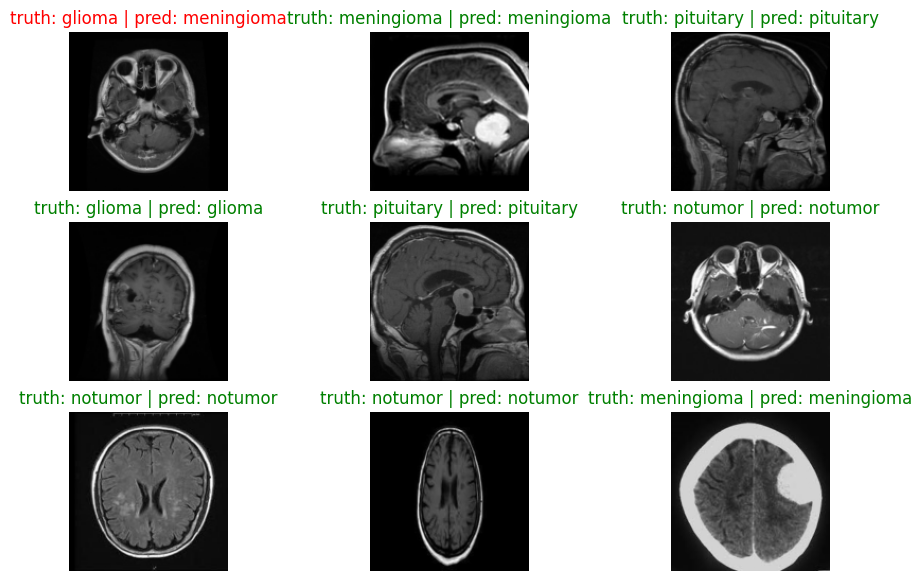

In [ ]:
plot_random_predictions(model_0, test_dataset)

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
conf_mat = ConfusionMatrix(task= 'multiclass', num_classes = len(class_names))
conf_mat

MulticlassConfusionMatrix()

In [ ]:
y_predictions = []
truth_labels = []
model_0.eval()
with torch.inference_mode():
  for X, y in test_dataloader:
    X, y = X.to(device), y.to(device)
    y_logits = model_0(X)
    y_preds = torch.argmax(torch.softmax(y_logits, dim= 1), dim= 1)
    y_predictions.append(y_preds.cpu())
    truth_labels.append(y.cpu())
y_pred_tensor = torch.cat(y_predictions)
y_truth_labels = torch.cat(truth_labels)

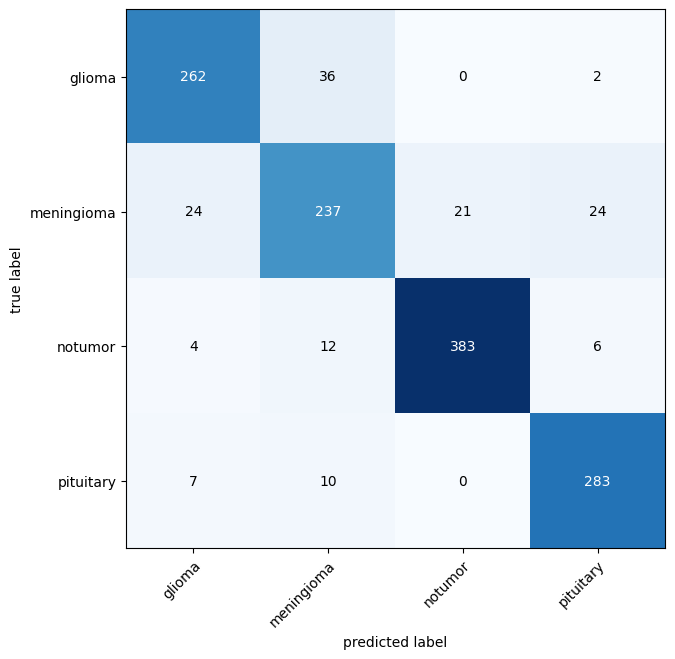

In [ ]:
matrix = conf_mat(preds= y_pred_tensor, target= y_truth_labels)
fig, ax = plot_confusion_matrix(conf_mat= matrix.numpy(),
                                class_names= class_names,
                                figsize=(10, 7));

In [ ]:
torch.save(model_0.state_dict(), 'cnn_model.pth')


In [ ]:
from google.colab import files
files.download('cnn_model.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>